## Starting Off:


Discuss with a partner what the goal is of fitting a linear regression model. 


In [1]:
import matplotlib.pyplot as plt
from math import exp
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)

# Linear Regression Assumptions

1. **Linearity**: The relationship between $X$ and $Y$ must be linear.
    - Check this assumption by examining a scatterplot of x and y.


2. **Independence of errors**: There is not a relationship between the residuals and the $Y$ variable; in other words, $Y$ is independent of errors.
    - Check this assumption by examining a scatterplot of “residuals versus fits”; the correlation should be approximately 0. In other words, there should not look like there is a relationship.


3. **Normality of errors**: The residuals must be approximately normally distributed.
    - Check this assumption by examining a normal probability plot; the observations should be near the line. You can also examine a histogram of the residuals; it should be approximately normally distributed.


4. **Equal variances**: The variance of the residuals is the same for all values of $X$.
    - Check this assumption by examining the scatterplot of “residuals versus fits”; the variance of the residuals should be the same across all values of the x-axis. If the plot shows a pattern (e.g., bowtie or megaphone shape), then variances are not consistent, and this assumption has not been met.



Basically, when we plot our residuals, we don't want to see a trend in what we get wrong.

<img src='https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions/_jcr_content/par/styledcontainer_2069/par/lightbox_e99c/lightboxImage.img.png/1548702854476.png' width=700>

<img src='https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions/_jcr_content/par/styledcontainer_2069/par/lightbox_7320/lightboxImage.img.png/1548702854735.png' width=700>

<img src='https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions/_jcr_content/par/styledcontainer_2069/par/lightbox_dccd/lightboxImage.img.png/1548702855060.png' width=700>

[Source](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions/)

## What does it mean if our model/data does not meet those assumptions?


The model can still be fit and predict a value. 

Remember that from our model we can create a prediction and a confidence interval for the predicted values.  

If we find that our errors follow a pattern then the assumptions we make about our confidence interval will not be accurate.  

<img src="slr_assumptions.jpg" style="width:600px;">

<img src='https://online.stat.psu.edu/onlinecourses/sites/stat501/files/02predicty/regress_mort_lat_PICI.png' width=700>



# Better Modelling with Data transformations

In [2]:
df = pd.read_csv('cleaned_movie_data.csv',index_col=0)


## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is to :
- answer questions, test business assumptions, generate hypotheses for further analysis
- prepare the data for modeling 

The thing that these two probably have in common is a good knowledge of your data to either get the answers that you need or to develop an intuition for interpreting the results of future 
modeling.

There are a lot of ways to reach these goals: you can get a basic description of the data, visualize it, identify patterns in it, identify challenges of using the data, etc.

In [3]:
df['gross'].describe()

count    3.142000e+03
mean     5.647369e+07
std      7.223622e+07
min      7.030000e+02
25%      1.083892e+07
50%      3.335371e+07
75%      7.357196e+07
max      7.605058e+08
Name: gross, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff31bd667b8>]],
      dtype=object)

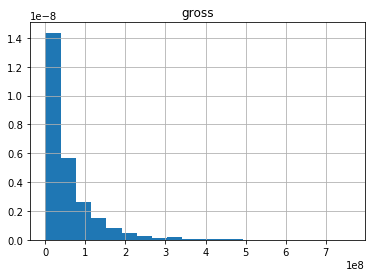

In [4]:
df.hist(column=['gross'], bins=20, density =True)

"None of your observed variables have to be normal in linear regression analysis, which includes t-test and ANOVA. The errors after modeling, however, should be normal to draw a valid conclusion by hypothesis testing."

https://data.library.virginia.edu/normality-assumption/

In [5]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'movie_imdb_link', 'num_user_for_reviews',
       'language', 'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'rating', 'G', 'PG', 'PG-13',
       'R', 'unrated', 'superstar', 'years_old'],
      dtype='object')

In [11]:
features =  ['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'budget',
 'actor_2_facebook_likes',
 'imdb_score','G', 'PG', 'PG-13',
'R', 'superstar', 'years_old']

In [12]:
df[features].dtypes

num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
budget                       float64
actor_2_facebook_likes       float64
imdb_score                   float64
G                              int64
PG                             int64
PG-13                          int64
R                              int64
superstar                      int64
years_old                      int64
dtype: object

In [13]:
from statsmodels.formula.api import ols

lr_model = ols(formula='gross~budget + cast_total_facebook_likes + director_facebook_likes + years_old +G +PG+R', data=df).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     348.3
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:25:25   Log-Likelihood:                -60410.
No. Observations:                3142   AIC:                         1.208e+05
Df Residuals:                    3134   BIC:                         1.209e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -6.526e+05   2.59e+06     -0.252      0.801   -5.73e+06    4.43e+06
budget                        1.0270      0.025     40.781      0.000       0.978       1.076
cast_total_facebook_likes   329.3692     49.684      6.629      0.000     231.952     426.786
director_facebook_likes    1407.7474    297.605      4.730      0.000     824.227    1991.268
years_old                  9.603e+05   1.18e+05      8.135      0.000    7.29e+05    1.19e+06
G                          2.012e+07   6.58e+06      3.059      0.002    7.22e+06     3.3e+07
PG                         6.035e+06   2.93e+06      2.062      0.039    2.98e+05    1.18e+07
R                         -8.016e+06   2.26e+06     -3.542      0.000   -1.25e+07   -3.58e+06
==============================================================================
Omnibus:                     1760.549   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25075.681
Skew:                           2.359   Prob(JB):                         0.00
Kurtosis:                      16.010   Cond. No.                     4.06e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Working with SKlearn

In [14]:
subset =[
 'director_facebook_likes',
 'cast_total_facebook_likes',
 'budget','G', 'PG', 
'R', 'superstar', 'years_old']

In [15]:
df[subset]

,director_facebook_likes,cast_total_facebook_likes,budget,G,PG,R,superstar,years_old
0,0.0,4834,237000000.0,0,0,0,0,7
1,563.0,48350,300000000.0,0,0,0,1,9
3,22000.0,106759,250000000.0,0,0,0,0,4
5,475.0,1873,263700000.0,0,0,0,0,4
6,0.0,46055,258000000.0,0,0,0,0,9
...,...,...,...,...,...,...,...,...
5021,157.0,1064,15000.0,0,0,1,0,11
5033,291.0,368,7000.0,0,0,0,0,12
5035,0.0,147,7000.0,0,0,1,0,24
5041,0.0,2386,53681048.4,0,0,0,0,4


In [18]:
df[subset].isnull().mean()

director_facebook_likes      0.0
cast_total_facebook_likes    0.0
budget                       0.0
G                            0.0
PG                           0.0
R                            0.0
superstar                    0.0
years_old                    0.0
dtype: float64

In [28]:
# fit a model
from sklearn.linear_model import LinearRegression

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm.fit(df[subset], df['gross'])


print(lm.intercept_)
print(lm.coef_)

-812596.6879702955
[ 1.39342251e+03  3.62455850e+02  1.02630179e+00  2.02185454e+07
  6.22701503e+06 -7.98410386e+06 -6.74369056e+06  9.59540875e+05]


In [29]:
y_pred = lm.predict(df[subset])

In [30]:
y_pred

array([2.50889826e+08, 3.27279356e+08, 3.28951734e+08, ...,
       1.42927456e+07, 5.89833427e+07, 1.70114128e+07])

Text(0, 0.5, 'Predictions')

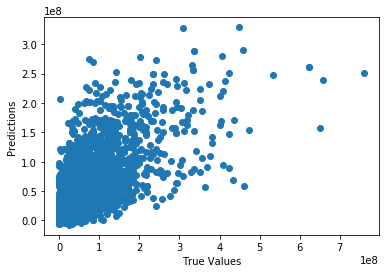

In [31]:
## The line / model
plt.scatter( df['gross'], y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

### Plot our residuals

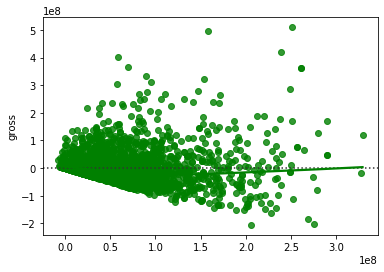

In [32]:
sns.residplot(y_pred, df['gross'], lowess=True, color="g")

### Plot the distribution of the residuals

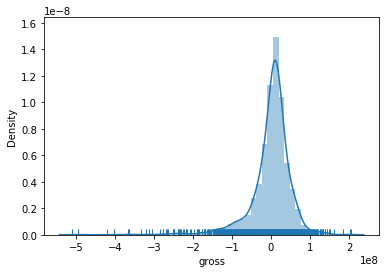

In [33]:
sns.distplot((y_pred- df['gross']), kde=True, rug=True);

#### How do we fix the normality issue:
Usually there are 3 reasons why this issue(error does not follow normal distribution) would occur:
- Non linear relationship between features and target
- Dependent or independent variables are too non-normal(can see from skewness or kurtosis of the variable)
- Existence of a few outliers/extreme values which disrupt the model prediction

https://towardsdatascience.com/is-normal-distribution-necessary-in-regression-how-to-track-and-fix-it-494105bc50dd

**We do however require a linear relationship between the target and each individual feature. The main way to check for this is by creating a scatterplot of the variables.**   

https://online.stat.psu.edu/stat462/node/123/

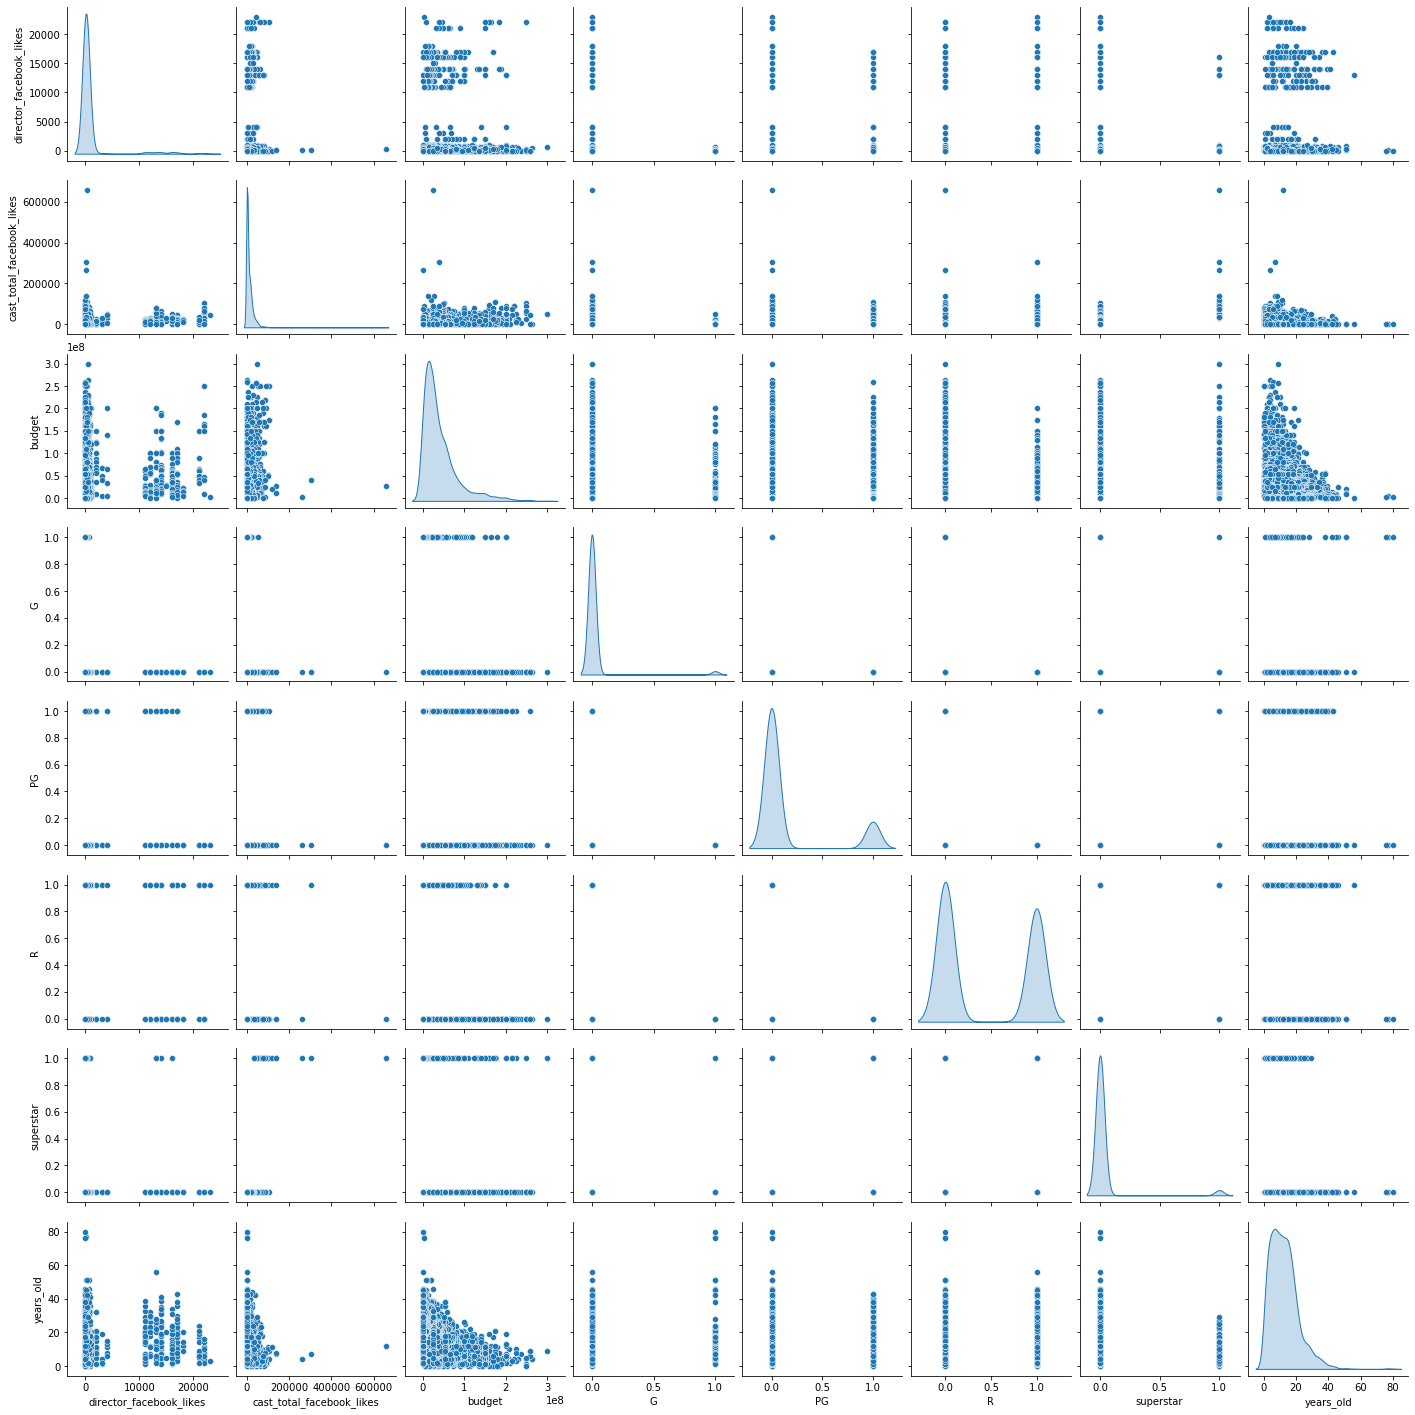

In [34]:
sns.pairplot(df[subset], diag_kind="kde", height=2.5)

In [36]:
#break the colums in to groups to plot 4 on a row at a time
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n)]

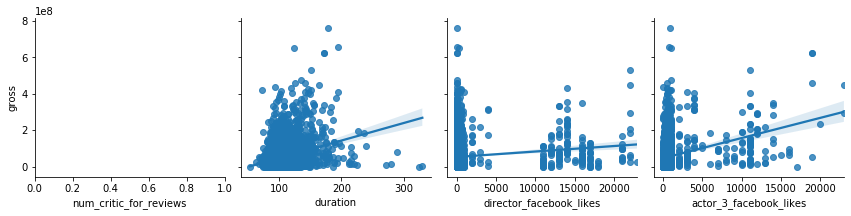

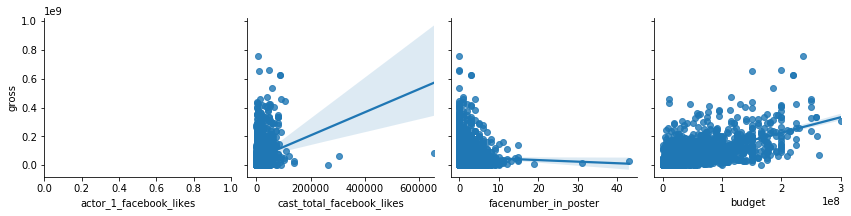

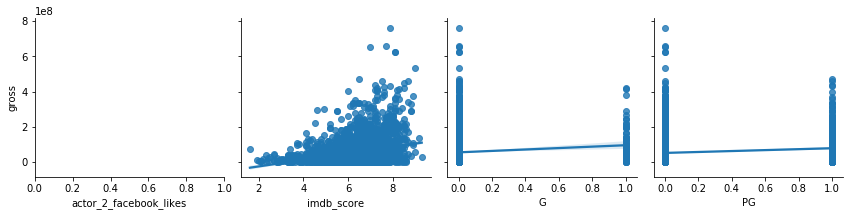

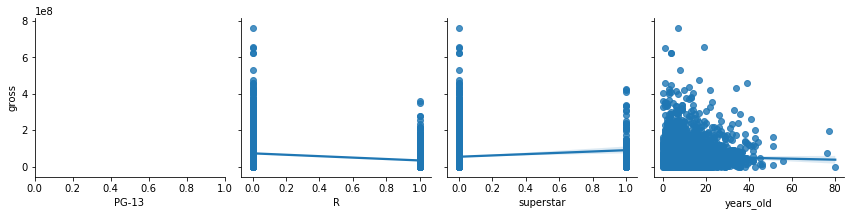

In [37]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['gross'],x_vars=i, kind="reg", height=3)

In [38]:
df['actor_1_facebook_likes'].describe()

count      3142.000000
mean       8150.281349
std       16568.236742
min           0.000000
25%         818.000000
50%        2000.000000
75%       13000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

In [39]:
df.shape

(3142, 32)

In [40]:
df = df[df['actor_1_facebook_likes']<630000]

In [41]:
df.shape

(3141, 32)

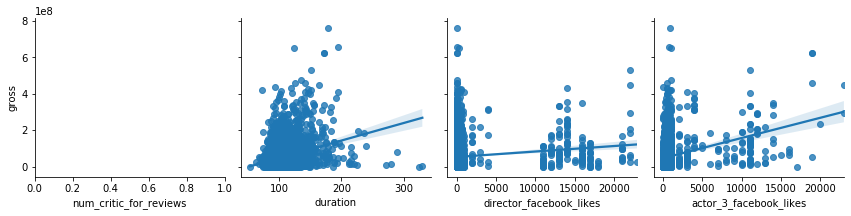

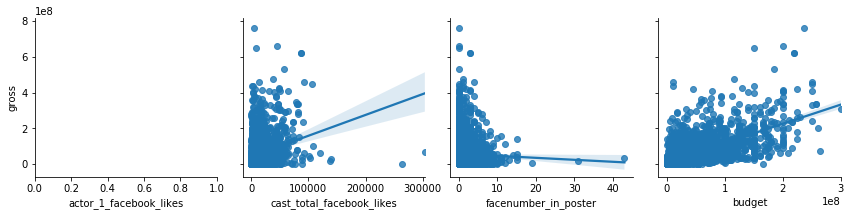

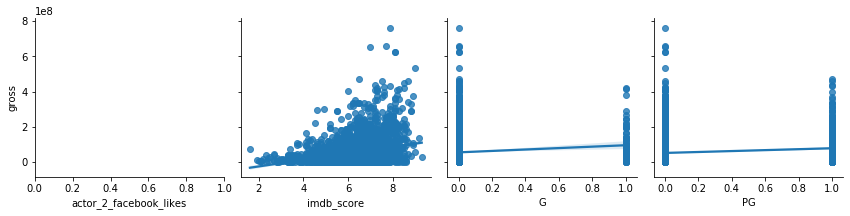

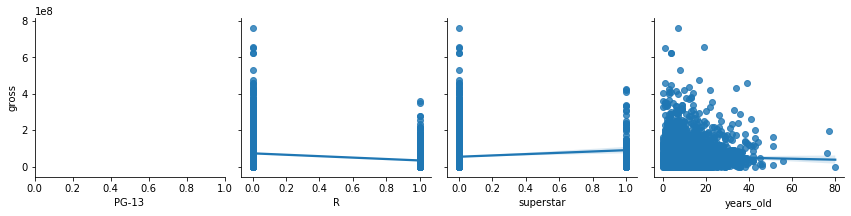

In [42]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['gross'],x_vars=i, kind="reg", height=3)

## Capturing Non-linear relationships



We can model non-linear relationships in a linear regression model by creating non-linear transformations of the data.

https://blog.minitab.com/blog/adventures-in-statistics-2/curve-fitting-with-linear-and-nonlinear-regression

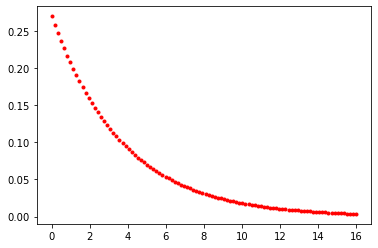

In [43]:
x = np.linspace(0, 16, 100)
Y = [0.27*exp(-0.27*_) for _ in x]
# error = norm.rvs(0, scale=0.03, size=100)
# simulated_data = [max(0, y+e) for (y,e) in zip(Y,error)]

# plt.plot(x, Y, 'b-')
plt.plot(x, Y, 'r.')
plt.show()

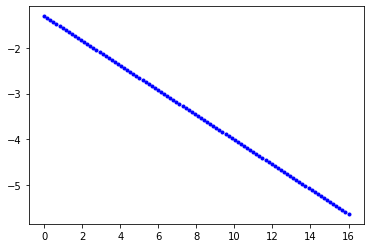

In [44]:
plt.plot(x, np.log(Y), 'b.')
plt.show()

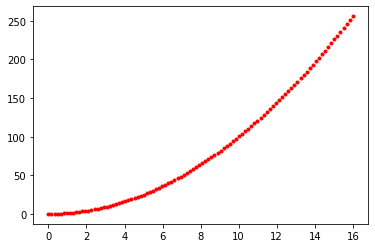

In [31]:
y = x*x

plt.plot(x, y, 'r.')
plt.show()


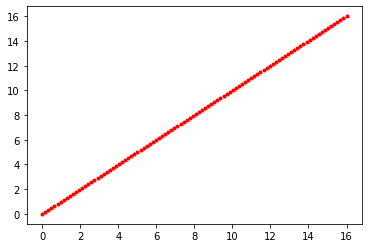

In [32]:
plt.plot(x,np.sqrt(y), 'r.')
plt.show()

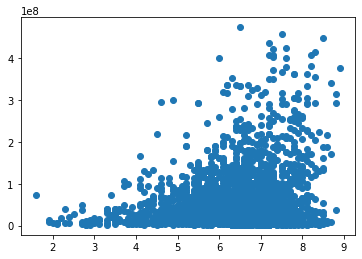

In [33]:
plt.scatter( df['imdb_score'], df['gross']);

In [ ]:
df['log_price'] = np.log(df['price'])

In [ ]:
target= df

In [ ]:
lr_model.fit(target, features)
predictions= lr_model.predict(new_data)

normal_price = np.exp(predictions)

rmse(normal_price, actuals)

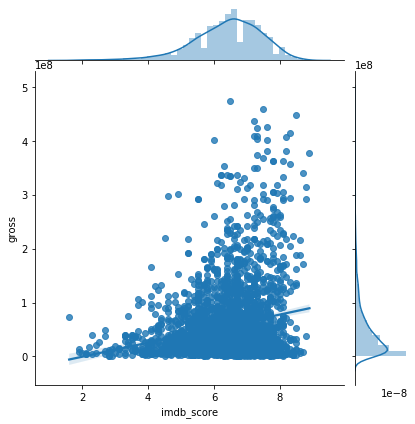

In [34]:
sns.jointplot(x="imdb_score", y="gross", data=df, kind="reg");


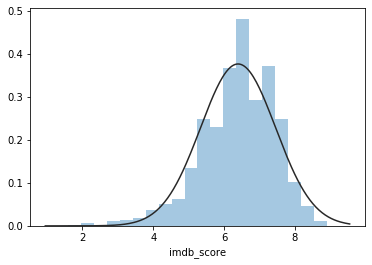

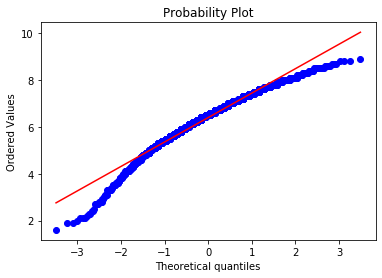

In [35]:


#histogram and normal probability plot
sns.distplot(df['imdb_score'], fit=norm, bins=20, kde=False);
fig = plt.figure()
res = stats.probplot(df['imdb_score'], plot=plt)


In [36]:
df['gross_log'] = np.log(df['gross'])


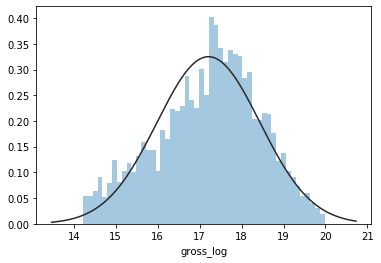

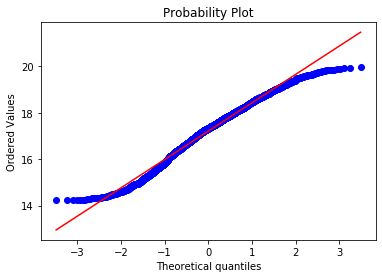

In [37]:
#transformed histogram and normal probability plot
sns.distplot(df['gross_log'], fit=norm,  bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['gross_log'], plot=plt)

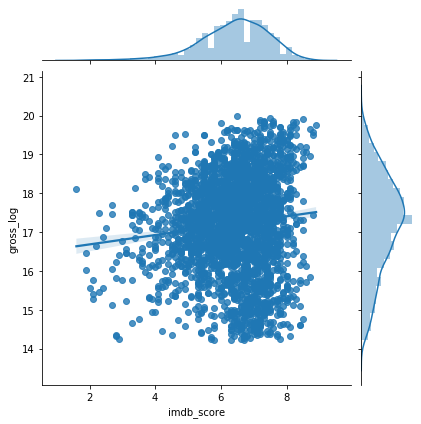

In [38]:
sns.jointplot(x="imdb_score", y="gross_log", data=df, kind="reg")

In [39]:
df['budget_log'] = np.log(df['budget'])


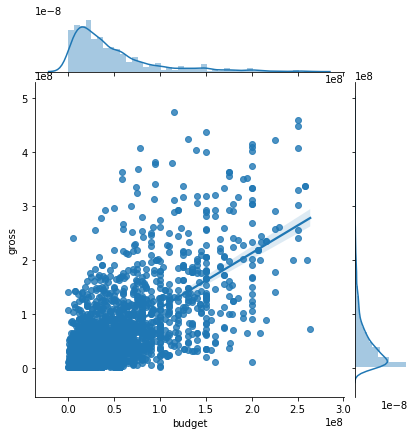

In [40]:
sns.jointplot(x="budget", y="gross", data=df, kind="reg")

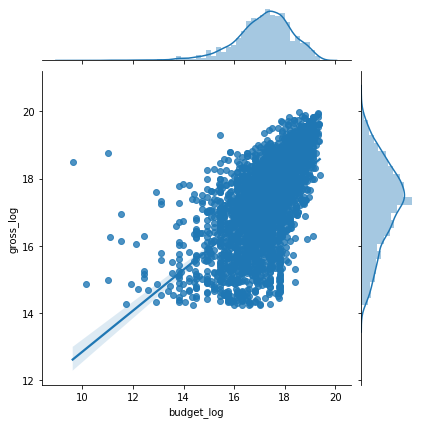

In [41]:
sns.jointplot(x="budget_log", y="gross_log", data=df, kind="reg")

***We can now use the natural log of price as our new target variable. We jsut need to undo this transformation after our predictions.***

`np.exp(df['gross_log']) `

https://stats.stackexchange.com/questions/260942/transforming-back-after-a-log-transformation

In [42]:
np.exp(df['gross_log']) 


2       2.000742e+08
3       4.481306e+08
5       7.305868e+07
6       3.365303e+08
7       2.008073e+08
            ...     
4971    3.272163e+07
4973    3.216970e+06
4977    1.152937e+07
5011    2.856622e+06
5012    1.049997e+07
Name: gross_log, Length: 2851, dtype: float64

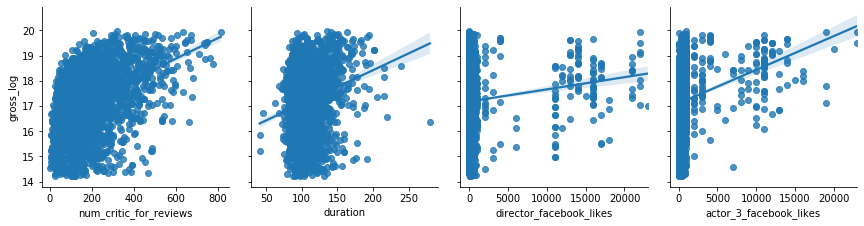

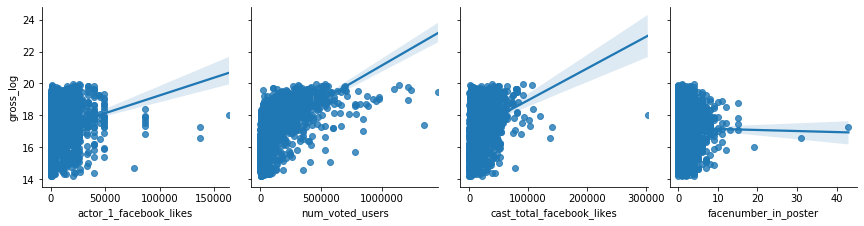

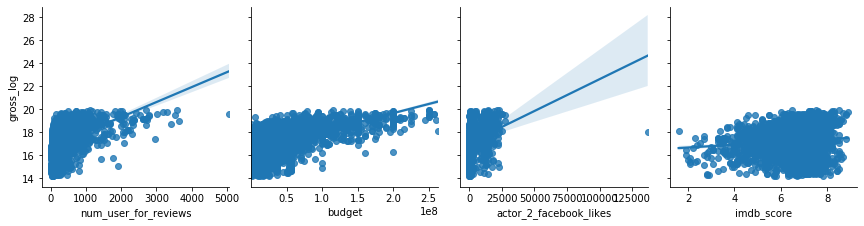

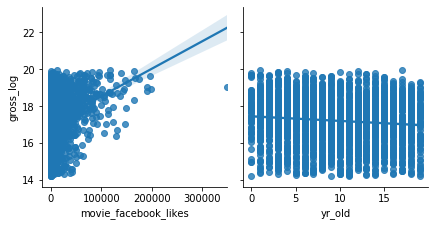

In [43]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['gross_log'],x_vars=i, kind="reg", height=3)

<img src='transformations.png'/>

## Polynomial Features 
<img src='noisy-sine-third-order-polynomial.png' width=500 />


Blog Explainaing polynomial features in more details.  

https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

### Interaction terms

Interaction terms help to capture the relationship between two variables when that relationship could be dependent on another variable.  

**For example**, what do you think is the relationship between temperature and Citibike rentals?

Is that relationship alwasy consistent?

**FYI** - You can use interactions for both continuous variables and categorical/dummy variables

**Question:** Thinking about the features that box office gross, what are two possible features that could be interacted with eachother to better show the relationship to the gross?

<img src="interactions.png" style="width:600px;">

In [ ]:
df['tempxrain']= df['temp']*df['rain']